# Tweets on Particular Topic

In [ ]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import csv

In [ ]:
import os
import pandas as pd
import nltk
import tweepy
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Word
from textblob.np_extractors import ConllExtractor
import sys
import requests
import json
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')

consumer_key= ''
consumer_secret= ''
access_token=''
access_token_secret=''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


print('Choose an option (1 or 2): ')
print('1. Choose a topic to search tweets for. ')
print('2. Choose a Twitter Username to search tweets for. ')
input_data = input()
#output_file = csv.writer(open('sentiment1.csv', 'w'))
#output_file.writerow(['Tweet', 'Sentiment', 'Confidence', 'PositiveScore', 'Negativescore', 'Areas of interest'])

if input_data=='1':
    print('Enter a topic: ')
    topic_name=input()
    new_tweets = api.search(q=topic_name)
    for tweet in new_tweets:
        analysis = TextBlob(tweet.text, analyzer=NaiveBayesAnalyzer(), np_extractor= ConllExtractor())
        polarity = 'Positive'
        if (analysis.sentiment.p_pos < 0.50):
            polarity = 'Negative'
    
        print ("Sentiment Analysis and Topic of Interest")
        print ("Tweet : ",tweet.text)
        print ("Sentiment:",polarity)
        print ("Confidence :  Positive score: " ,analysis.sentiment.p_pos*100, "  Negative score: ", analysis.sentiment.p_neg*100 )
        print ("Areas of interest: ", analysis.noun_phrases)
        #dataFrame = pd.DataFrame({'Tweet':tweet, 'Positive Score':analysis.sentiment.p_pos*100,'polarity': polarity})
        #dataFrame.to_csv('test.csv', sep=',', encoding='utf-8')
        print ("---------------------------------------------------------------------------")
        #csvWriter.writerow(["tweet.created_at","tweet.text","polarity,analysis.sentiment.p_pos*100","analysis.sentiment.p_neg*100","analysis.noun_phrases"])
        #print(tweet.created_at, tweet.text, polarity)
        #output_file.writerow([tweet.created_at, tweet.text, polarity])
        #output_file.writerow(['tweet.created_at', 'tweet.text', 'tweet.Confidence', 'tweet.PositiveScore', 'tweet.Negativescore', 'tweet.Areas of interest'])
else:
    print('2. Enter a Twitter Username to search tweets for: ')
    screen_name= input()
    new_tweets = api.user_timeline(screen_name =screen_name,count=20)
    for tweet in new_tweets:
        analysis = TextBlob(tweet.text, analyzer=NaiveBayesAnalyzer(), np_extractor= ConllExtractor())
        polarity = 'Positive'
        if (analysis.sentiment.p_pos < 0.50):
            polarity = 'Negative'
        print ("Sentiment Analysis and Topic of Interest")
        print ("Tweet : ",tweet.text)
        print ("Sentiment:",polarity)
        print ("Confidence :  Positive score: " ,analysis.sentiment.p_pos*100, "  Negative score: ", analysis.sentiment.p_neg*100 )
        print ("Areas of interest: ", analysis.noun_phrases)
        print ("---------------------------------------------------------------------------")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
Choose an option (1 or 2): 
1. Choose a topic to search tweets for. 
2. Choose a Twitter Username to search tweets for. 
1
Enter a topic: 
modi
Sentiment Analysis and Topic of Interest
Tweet :  RT @Manpree51528978: Modi is fighting with INDIA so Ambani and Adani can sell wheat floor for 150 rupees per kg
Farmers is fighting with MO…
Sentiment: Positive
Confidence :  Positive score:  99.45362586241718   Negative score:  0.546374137582769
Areas of interest:  ['manpree51528978', 'modi', 'ambani', 'adani', 'wheat floor', 'kg farmers']
---------------------------------------------------------------------------
Sentiment Analysis and Topic o

# Tweets of Particular Topic of Interest

In [ ]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Calling keys through which we can access the tweets
consumer_key= ''
consumer_key_secret= ''
access_token=''
access_token_secret=''
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
query = 'corona'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

Graph Exploration of Tweets Fetched

Total Positive =  235
Total Negative =  95
Total Neutral =  1670


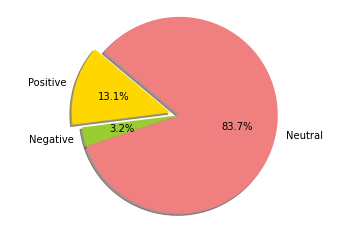

In [ ]:
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
#sizes = [262, 223, 520]
sizes = [262, 63, 1675]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1,0 , 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Using SubPlot

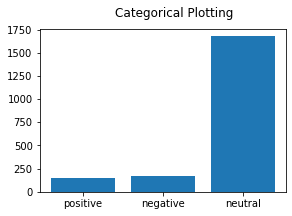

In [ ]:
names = ['positive', 'negative', 'neutral']
values = [154, 171, 1675]

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Categorical Plotting', x = 0.25)

plt.show()

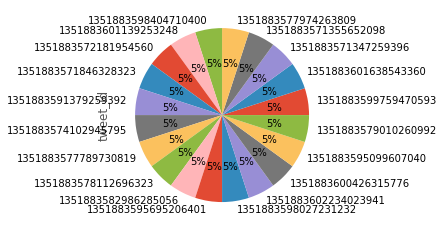

In [ ]:
data_source_url = "/content/corona.csv"
corona_tweets = pd.read_csv(data_source_url)


corona_tweets.tweet_id.value_counts().plot(kind='pie', autopct='%1.0f%%')


In [ ]:
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('corona1.json', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('corona1.json', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('corona1.csv')

In [ ]:
print(all_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



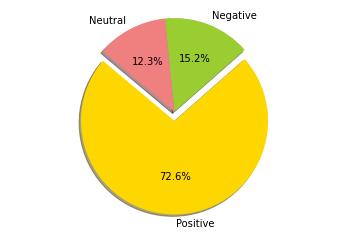

In [ ]:
a = tweet_dataset.head()
labels = 'Positive', 'Negative', 'Neutral'
sizes = [527, 110, 89]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1,0 , 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
tweet_dataset.shape

(2000, 5)

In [ ]:
tweet_dataset.columns


Index(['tweet_id', 'text', 'favorite_count', 'retweet_count', 'created_at'], dtype='object')

In [ ]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1352170710605721601,"Morocco, Germany, or London? If you are given ...",0,0,Thu Jan 21 08:26:34 +0000 2021
1,1352170707728424961,Nachdem ich fast 2 Wochen nur in Heimen mit Co...,0,0,Thu Jan 21 08:26:33 +0000 2021
2,1352170703588642817,RT @TwitPollNL: In Japan wordt getwijfeld of d...,0,11,Thu Jan 21 08:26:32 +0000 2021
3,1352170703408287744,RT @brueder_grimm: Es geht in die richtige Ric...,0,1,Thu Jan 21 08:26:32 +0000 2021
4,1352170702909165568,RT @AfD_HD: Nächster Schritt ein Sprechverbot ...,0,10,Thu Jan 21 08:26:32 +0000 2021


In [ ]:
tweet_dataset.tail()

,tweet_id,text,favorite_count,retweet_count,created_at
1995,1352167360619274242,RT @GulshanIsGem: Biggest Error \nOf 2020 \nCo...,0,11,Thu Jan 21 08:13:15 +0000 2021
1996,1352167358652174336,@sternenfalke Werden die Teile nun nur wegen C...,0,0,Thu Jan 21 08:13:15 +0000 2021
1997,1352167353912537089,"RT @QuirinWeber: Der Vorwurf, die Pandemie-Pol...",0,2,Thu Jan 21 08:13:13 +0000 2021
1998,1352167352717225990,#PfizerVaccine : फाइजर की वैक्‍सीन नहीं लड़ पा...,1,0,Thu Jan 21 08:13:13 +0000 2021
1999,1352167352662708225,"RT @ntvde: Corona, Klima, Migration: Wie Biden...",0,3,Thu Jan 21 08:13:13 +0000 2021


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

tweet_dataset.head()


,tweet_id,text,favorite_count,retweet_count,created_at
0,1351903044850606081,Do one need pastor or passport to know that ...,0,0,Wed Jan 20 14:42:57 +0000 2021
1,1351903043978211328,RT : Imagine a sequel with them fighting Corona,0,874,Wed Jan 20 14:42:57 +0000 2021
2,1351903039444180992,They just said that corona done killed more pe...,0,0,Wed Jan 20 14:42:56 +0000 2021
3,1351903034369052672,Lees ook: Kappers slaan alarm om spelregels lo...,0,0,Wed Jan 20 14:42:55 +0000 2021
4,1351903033664278529,もう200行くじゃん すごいのますうだ,0,0,Wed Jan 20 14:42:55 +0000 2021


In [ ]:
tweet_dataset['text'].head()

0      Do one need pastor or passport to know that ...
1      RT : Imagine a sequel with them fighting Corona
2    They just said that corona done killed more pe...
3    Lees ook: Kappers slaan alarm om spelregels lo...
4                                  もう200行くじゃん すごいのますうだ
Name: text, dtype: object

In [ ]:
corpus = []
for i in range(0, 1000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

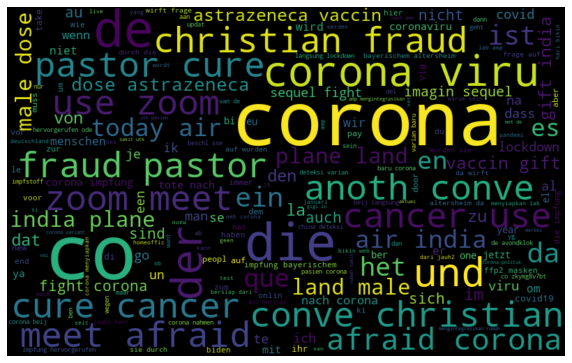

In [ ]:
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Plotting Live Graph of Sentiment using Matplotlib

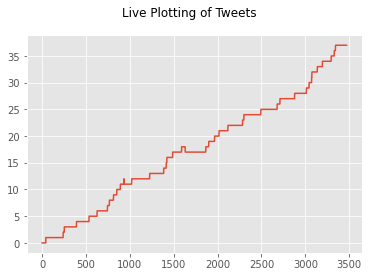

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time
 
style.use("ggplot")
 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
labels = ["Tweets", "polarity"]
 
def animate(i):
    pullData = open("/content/corona1.csv","r").read()
    lines = pullData.split('\n')
 
    xar = []
    yar = []
 
    x = 0
    y = 0
    for l in lines[-100000:]:
        x += 1
        if "pos" in l:
            y+=1
        elif "neg" in l:
            y-=1
 
        xar.append(x)
        yar.append(y)
         
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate,labels,interval=100,save_count=1000)
plt.suptitle('Live Plotting of Tweets')
plt.show()

